In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
df = pd.read_csv('../Datasets/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
x = df.iloc[:,[3,4]]

Text(0, 0.5, 'Customers')

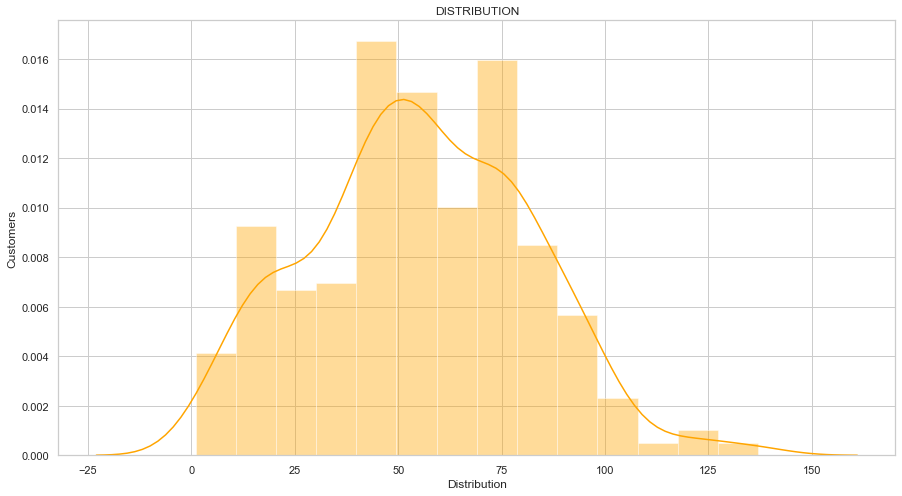

In [5]:
fig = plt.figure(figsize=(15,8))
sns.set(style='whitegrid')
plt.title('DISTRIBUTION')
sns.distplot(x,color='orange')
plt.xlabel('Distribution')
plt.ylabel('Customers')

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [7]:
x.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


Text(0.5, 1.0, 'Distribution of Annual Income')

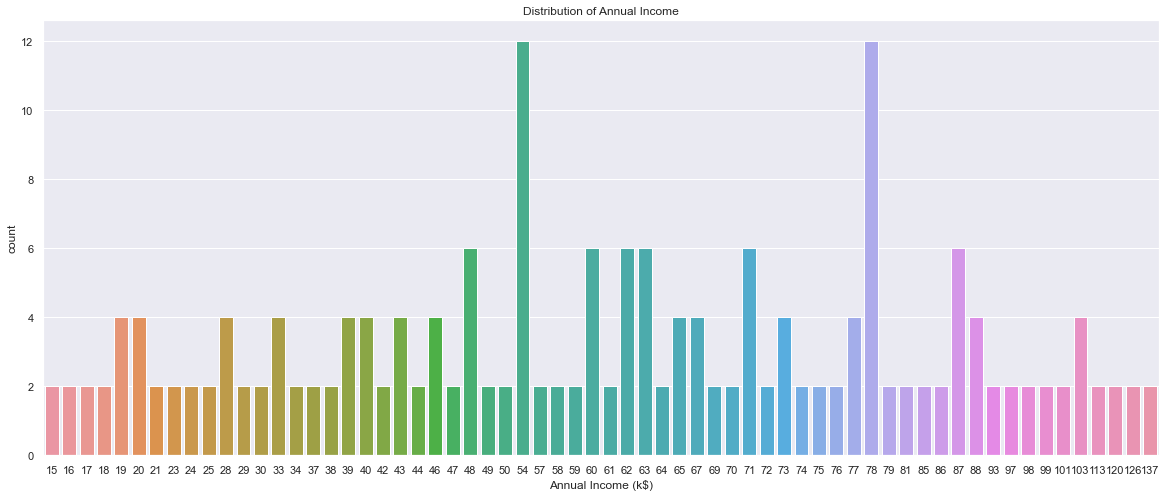

In [8]:
figure = plt.figure(figsize=(20,8))
sns.set(style='darkgrid')
sns.countplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income')

Text(0, 0.5, 'Range of Annual Income')

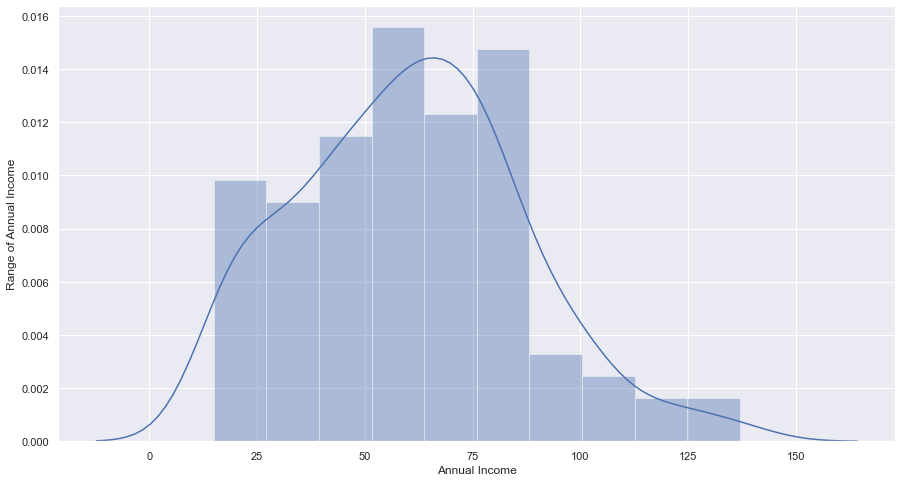

In [9]:
figure = plt.figure(figsize=(15,8))
sns.distplot(df['Annual Income (k$)'])
plt.xlabel('Annual Income')
plt.ylabel('Range of Annual Income')

Text(0.5, 1.0, 'Distribution of Age')

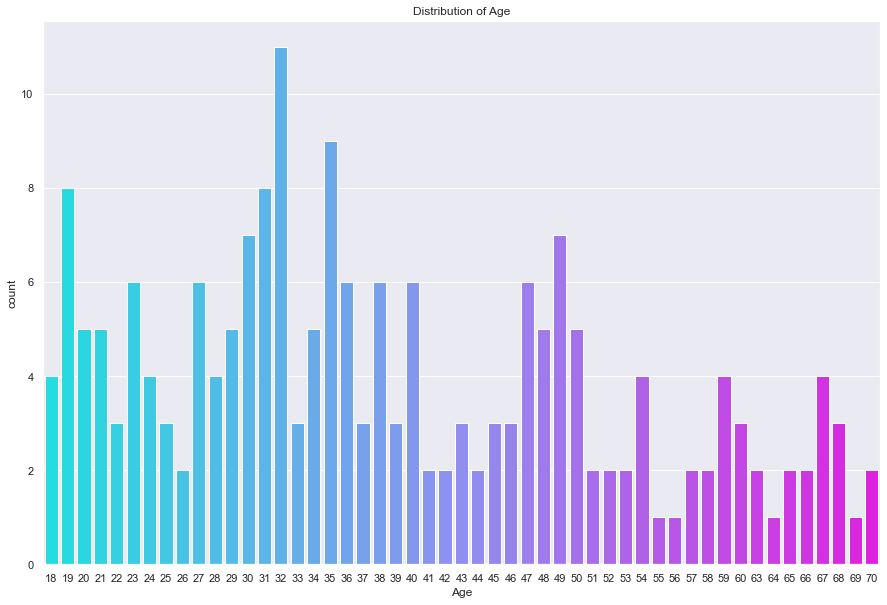

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(df['Age'],palette='cool')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Gender')

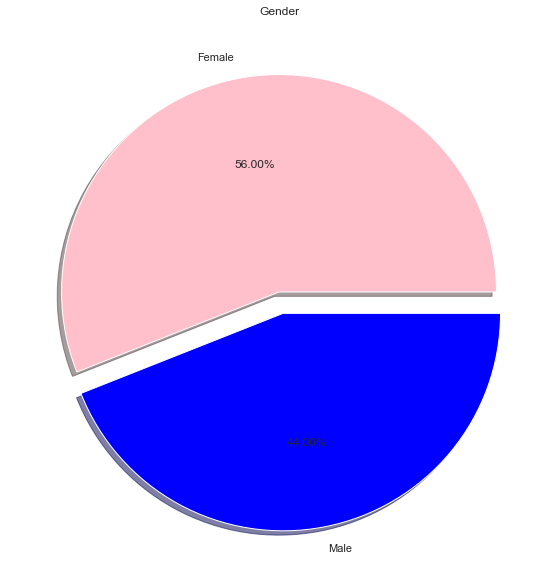

In [19]:
plt.figure(figsize=(10,10))
plt.pie(df['Genre'].value_counts(),explode=[0,0.1],labels=['Female','Male'],shadow=True,colors=['pink','blue'],autopct='%.2f%%')
plt.title('Gender')

Text(0.5, 1.0, 'Count')

<Figure size 720x576 with 0 Axes>

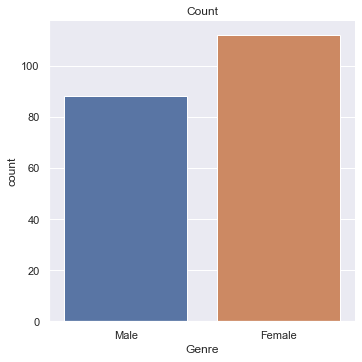

In [28]:

plt.figure(figsize=(10,8))
sns.catplot('Genre',data=df,kind='count')
plt.title('Count')

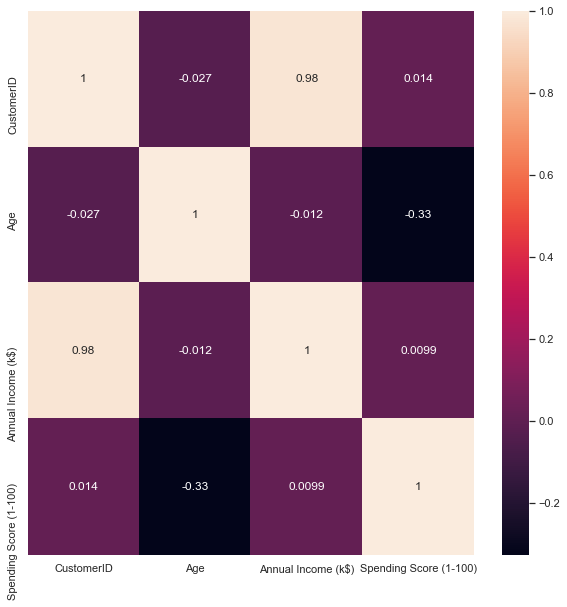

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Text(0, 0.5, 'Within cluster sum of squares')

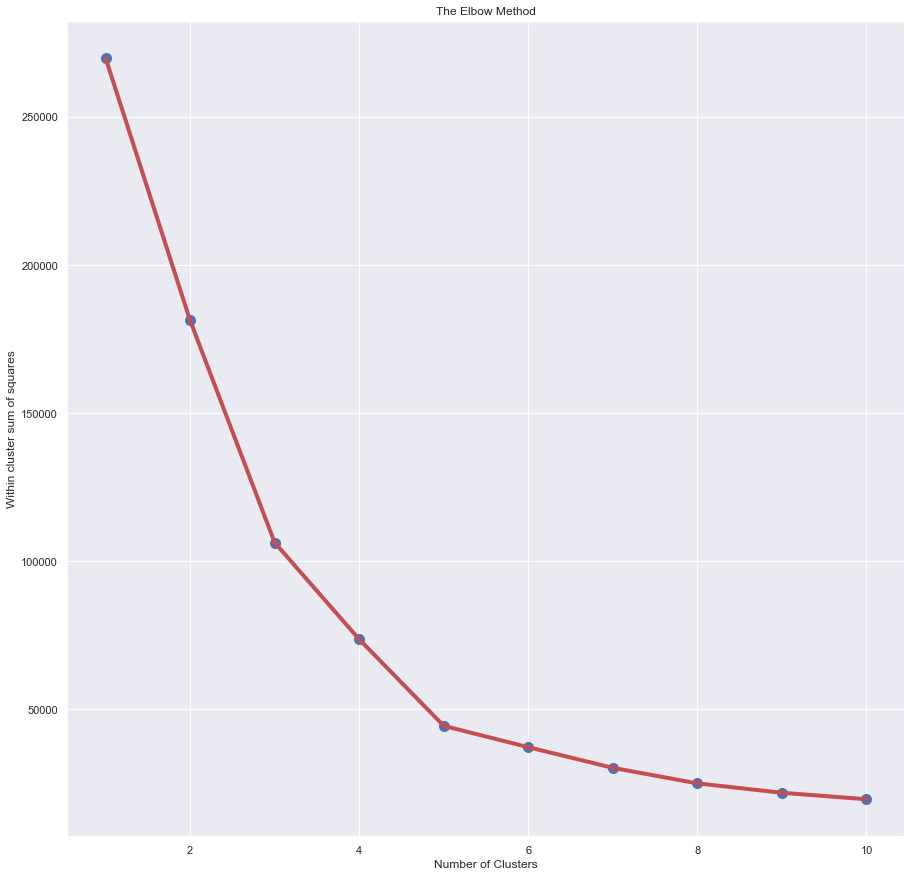

In [33]:
from sklearn.cluster import KMeans
wcss =[]
x = df.iloc[:,[3,4]].values
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=0).fit(x)
    # print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,15))
plt.scatter(range(1,11),wcss,c='b',s=100)
plt.plot(range(1,11),wcss,c='r',linewidth=4)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within cluster sum of squares')

In [34]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(x)

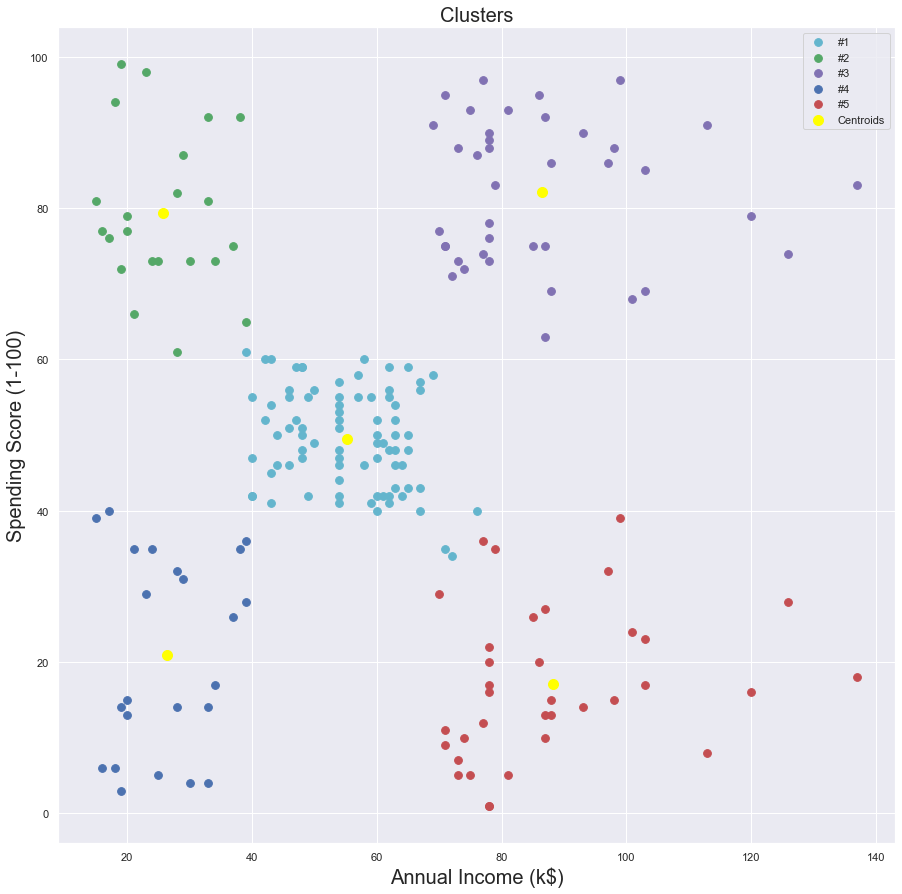

In [37]:
plt.figure(figsize=(15,15))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 60, c = 'c', label = '#1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 60, c = 'g', label = '#2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 60, c = 'm', label = '#3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 60, c = 'b', label = '#4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 60, c = 'r', label = '#5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.show()

## The customers in first cluster(cyan) have average annual income as well as average spending score.In case of the second cluster(green),customers with lower annual income but higher spending score belong to it.People with both higher annual income and higher spending score belong to third cluster(magenta).The customers in fourth cluster(blue) have lower annual income and lower spending score.People in fifth cluster(red) have lower spending score but have a high annual income!